In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager as fm
sns.set_context('talk',font_scale=1.4)
import argparse
import os
import warnings
warnings.filterwarnings("ignore")
#%matplotlib inline

In [2]:
#Read the csv file
customerData = pd.read_csv("data//TDashboardData_customersatisfaction_20150101-20161231.csv",usecols=[0,2,3,4])

In [ ]:
parser = argparse.ArgumentParser(description='Process some characters.')
parser.add_argument("tag",help="ENTER THE DATE IN 'JUL-2015' format: ")
args = parser.parse_args()
inputDate = args.tag

In [3]:
#Get the overall rating
OverallRating = customerData[customerData['Question Text'].str.contains('How would you rate the mbta overall?')]

In [37]:
#inputDate = 'JUL-2015'

In [5]:
if not os.path.exists('Analysis_5') :
    os.mkdir('Analysis_5', 755 )

In [6]:
customerData.to_csv("Analysis_5//Analysis_5_part1.csv",index=False)

In [7]:
#Removing the date part from the date
OverallRating['Survey Date'] = OverallRating['Survey Date'].str[3:]

In [8]:
#calculating mean rating
meanRating = OverallRating['Average Rating Out of 7'].mean()

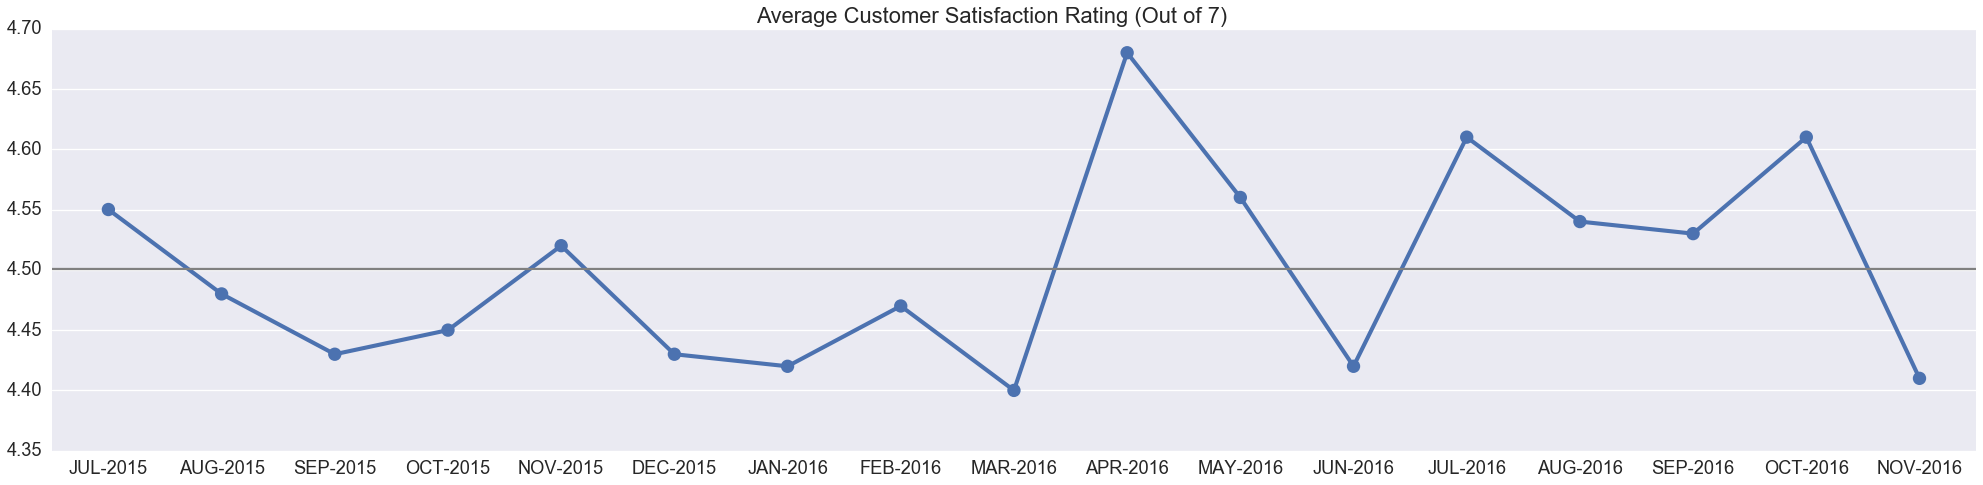

In [11]:

#Plot factor plot
plt.figure(figsize=(20,8))
sns.set_context("talk", font_scale=1.4)
g = sns.factorplot(y='Average Rating Out of 7', x='Survey Date', data=OverallRating, aspect=4, size=7)

# For reference line as mean
g = g.map(plt.axhline, y=meanRating, ls="-", c='0.5')

#Add Title
g = g.fig.suptitle('Average Customer Satisfaction Rating (Out of 7)')
plt.savefig("Analysis_5/Analysis_5_part1.jpg", bbox_inches='tight')

In [38]:
#read csv
ResponseData = pd.read_csv("data//TDashboardData_customersatisfaction_20150101-20161231.csv",usecols=[0,2,6,8,10,12,14,16,18])

In [36]:
#inputDate = 'JUL-2015'

In [39]:
#Strip the date part from time
ResponseData['Survey Date'] = ResponseData['Survey Date'].str[3:]

In [40]:
#Change Column names
ResponseData.columns = ['Survey Date', 'Question Text', 'Strongly Disagree','Disagree', 'Slightly Disagree', 'Neither Agree nor Disagree','Slightly Agree', 'Agree', 'Strongly Agree']

In [41]:
#Calculate Percentages
ResponseData['Strongly Disagree'] = ResponseData['Strongly Disagree'].apply(lambda x : float(x)*100)
ResponseData['Disagree'] = ResponseData['Disagree'].apply(lambda x : float(x)*100)
ResponseData['Slightly Disagree'] = ResponseData['Slightly Disagree'].apply(lambda x : float(x)*100)
ResponseData['Neither Agree nor Disagree'] = ResponseData['Neither Agree nor Disagree'].apply(lambda x : float(x)*100)
ResponseData['Slightly Agree'] = ResponseData['Slightly Agree'].apply(lambda x : float(x)*100)
ResponseData['Agree'] = ResponseData['Agree'].apply(lambda x : float(x)*100)
ResponseData['Strongly Agree'] = ResponseData['Strongly Agree'].apply(lambda x : float(x)*100)

In [42]:
#Get questions
Response1Data = ResponseData[ResponseData['Survey Date'].str.contains(inputDate) & ResponseData['Question Text'].str.contains('How would you rate the mbta overall?')]
Response2Data = ResponseData[ResponseData['Survey Date'].str.contains(inputDate) & ResponseData['Question Text'].str.contains('How likely are you to continue using the mbta in the future?')]
Response3Data = ResponseData[ResponseData['Survey Date'].str.contains(inputDate) & ResponseData['Question Text'].str.contains('The mbta provides reliable public transportation services')]
Response4Data = ResponseData[ResponseData['Survey Date'].str.contains(inputDate) & ResponseData['Question Text'].str.contains('Speed/travel time')]

In [43]:
#Change shape for calculation
Response1Data = pd.melt(Response1Data, id_vars=['Survey Date', 'Question Text'])
Response2Data = pd.melt(Response2Data, id_vars=['Survey Date', 'Question Text'])
Response3Data = pd.melt(Response3Data, id_vars=['Survey Date', 'Question Text'])
Response4Data = pd.melt(Response4Data, id_vars=['Survey Date', 'Question Text'])

In [44]:
Response1Data.to_csv("Analysis_5//Analysis_5_part2.csv",index=False)
Response2Data.to_csv("Analysis_5//Analysis_5_part3.csv",index=False)
Response3Data.to_csv("Analysis_5//Analysis_5_part4.csv",index=False)
Response4Data.to_csv("Analysis_5//Analysis_5_part5.csv",index=False)

In [45]:
# The slices will be ordered and plotted counter-clockwise.
labels = Response1Data.variable.tolist()
sizes1 = Response1Data.value.tolist()
sizes2 = Response2Data.value.tolist()
sizes3 = Response3Data.value.tolist()
sizes4 = Response4Data.value.tolist()
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','orange','purple','grey']

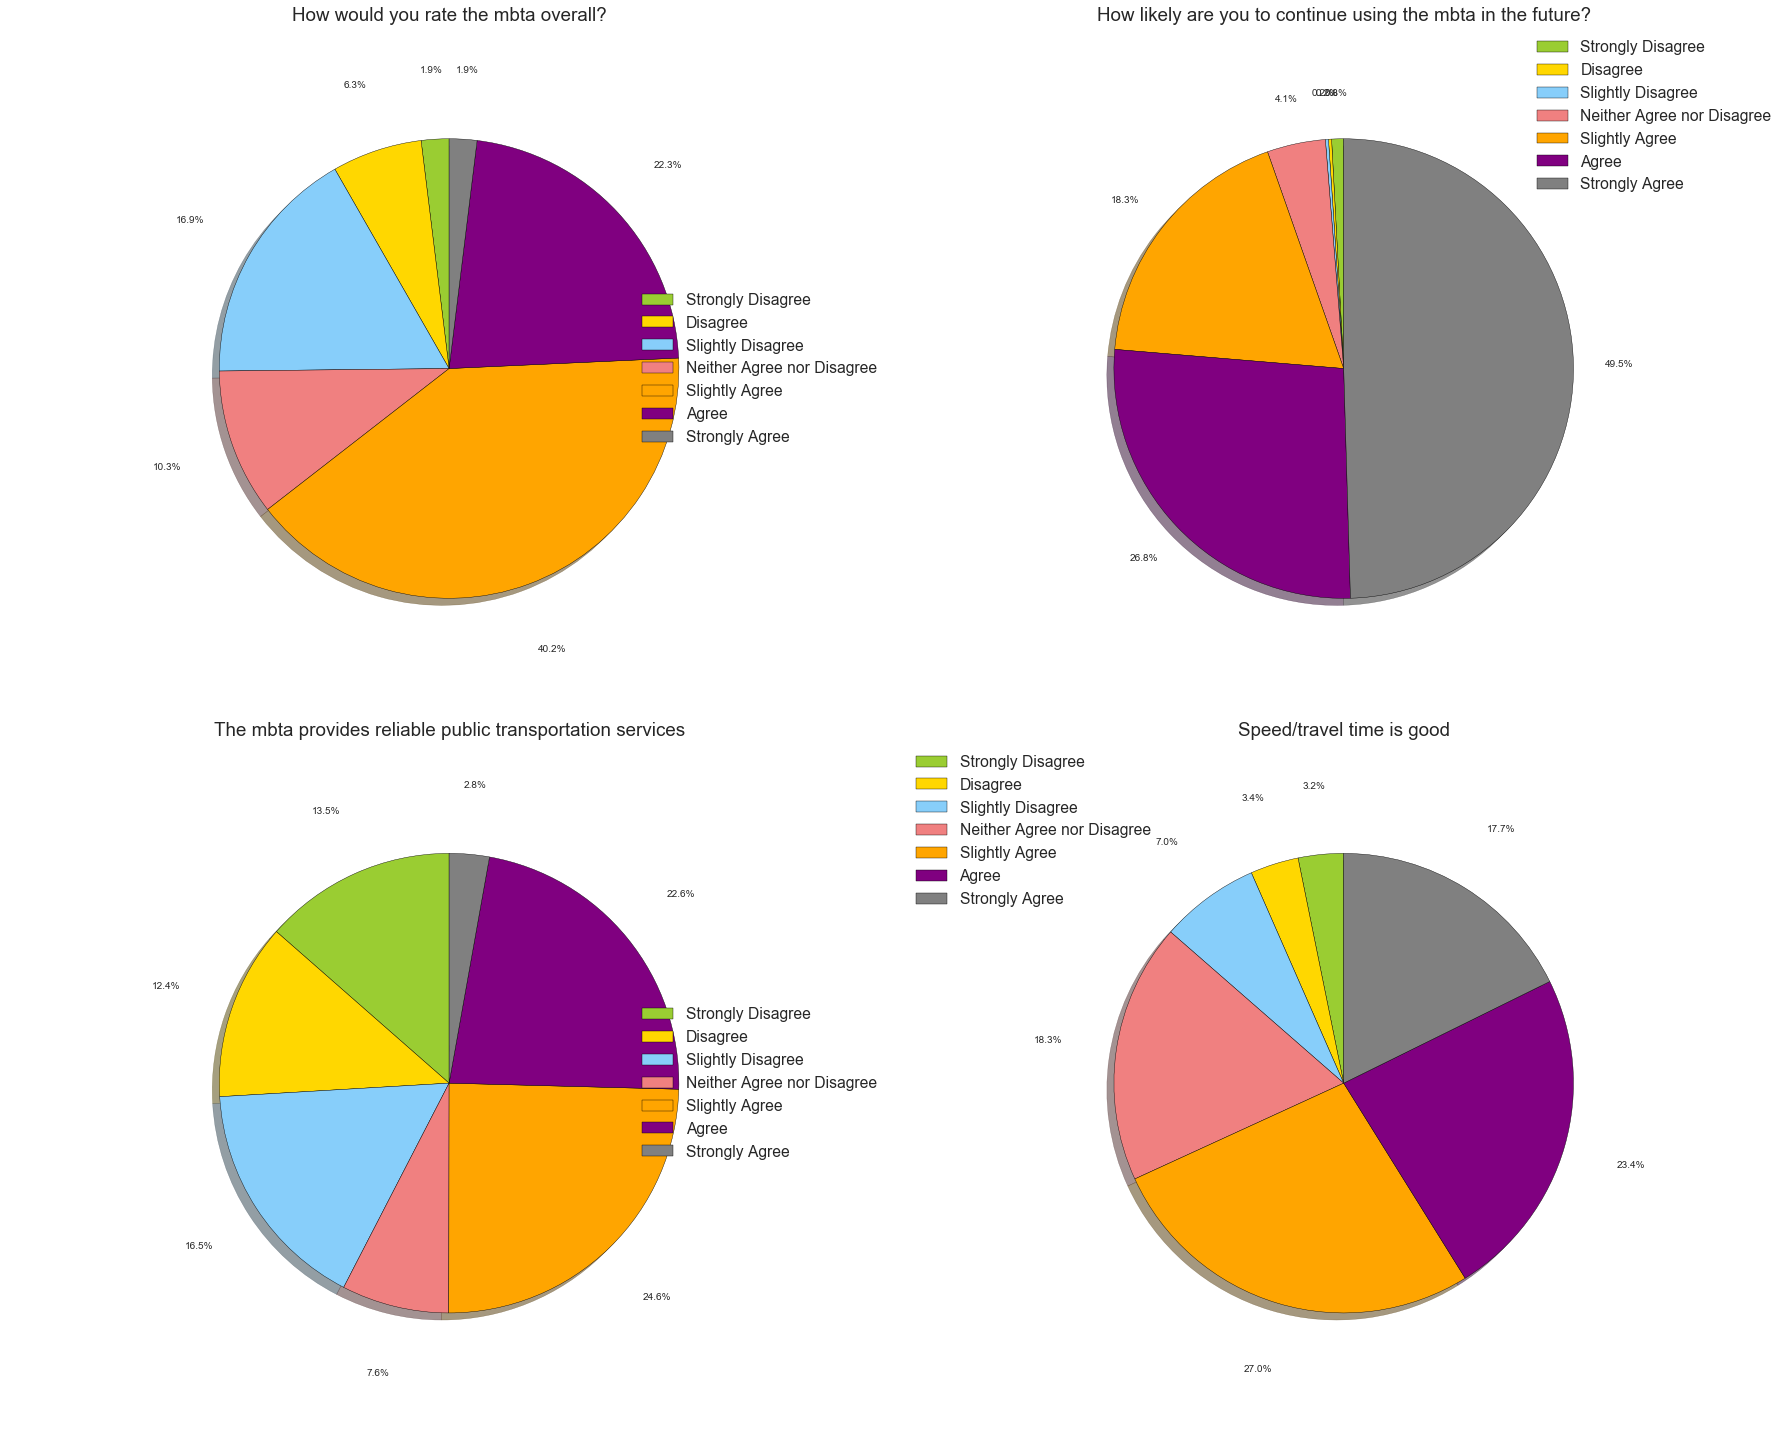

In [52]:
fg,ax = plt.subplots(2,2,figsize=(25,20),sharex=True)

ax[0,0].pie(sizes1,colors=colors,
       autopct='%1.1f%%', shadow=True, startangle=90,
       radius=0.65, pctdistance=1.3, labeldistance=1.5)
ax[0,1].pie(sizes2, colors=colors,
       autopct='%1.1f%%', shadow=True, startangle=90,
       radius=0.65, pctdistance=1.2, labeldistance=1.5)
ax[1,0].pie(sizes3, colors=colors,
       autopct='%1.1f%%', shadow=True, startangle=90,
       radius=0.65, pctdistance=1.3, labeldistance=1.5)
ax[1,1].pie(sizes4, colors=colors,
       autopct='%1.1f%%', shadow=True, startangle=90,
       radius=0.65, pctdistance=1.3, labeldistance=1.5)

ax[0,0].set_title('How would you rate the mbta overall?')
ax[0,1].set_title('How likely are you to continue using the mbta in the future?')
ax[1,0].set_title('The mbta provides reliable public transportation services')
ax[1,1].set_title('Speed/travel time is good')

#patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
ax[0,0].legend(labels, loc="right")
ax[0,1].legend(labels, loc="best")
ax[1,0].legend(labels, loc="right")
ax[1,1].legend(labels, loc="best")

# Set aspect ratio to be equal so that pie is drawn as a circle.
ax[0,0].set_aspect('equal')
ax[0,1].set_aspect('equal')
ax[1,0].set_aspect('equal')
ax[1,1].set_aspect('equal')

plt.subplots_adjust(left = 0.09, bottom=0.20, right=0.94, top= 0.93, wspace = 0.2, hspace = 0)
plt.tight_layout()
plt.savefig("Analysis_5/Analysis_5_part2.jpg", bbox_inches='tight')
plt.show()